In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [97]:
### RECORREMOS UNA PROFUNDIDAD

dz = 0.008e-6 ## Paso en Profundidad  nm
start_z = 0
stop_z = 1e-6

dx = 0.1e-6  ## Paso en Superficie um
start_x = 0e-6
stop_x = 10e-6

### EN UN TIEMPO 
dt = 10e-15  ## Time Step fs
start_t = 0
stop_t = 20e-12 ## Finalizamos a ps

x = np.linspace(start_x,stop_x,int(round((stop_x-start_x)/dx)))
z = np.linspace(start_z,stop_z,int(round((stop_z-start_z)/dz)))
t = np.linspace(start_t,stop_t,int(round((stop_t-start_t)/dt)))

X,Z= np.meshgrid(x,z)

## Auxiliar para Plot X-Z en punto medio de Y
x_mid = x.shape[0]//2

In [98]:
# ------------- Red Electrones -----------------
Ce_aux = 134.5 # J / (m^3 K^2)
ke = 235  # J /(m K s)
g = 5.69e17 # J /(m K^3 s)

#  ----------------------------------------------

# ------------- Red Lattice -----------------
Ci = 2.42e6  # J / (m^3 K)
#  -------------------------------------------


# ------------- Parámetros Láser -----------------
R = 0.88 # Reflectancia A.U.
delta = 20e-9 # Optical Penetration (nm)
ball_len = 100e-9 # Ballistic Length (nm)
 
tp = 100e-15 # FWHM fs
w0 = 5e-6 # Waist um
wavelength = 1.032e-6 # Wavelength (um)
#  ------------------------------------------------------

# ------------- Parámetros Varios -----------------
ys = 3e-6 ## Perfil de Apertura del Láser (um)
T0 = 300 # K Temperatura Ambiente (K)
x0 = 0 # Posición central del Spot en x
y0 = 0 # Posición central del Spot en y
zs = 0 # Z superficial
n = 1 ## Refractive Index
Zr = n*np.pi*w0**2/wavelength
w = w0*(1+Z**2/Zr**2)**1/2

In [99]:
F = 2.0e4 # J/cm**2

In [100]:
Z.shape

(125, 100)

In [101]:
z.shape

(125,)

In [102]:
radius_crater

1.385e-06

In [103]:
ZS = depth_crater * np.sqrt(1-X**2/radius_crater**2)
ZS = np.nan_to_num(ZS,copy = False)

C:\Users\lomenaca\AppData\Local\Temp\ipykernel_19696\1893438325.py:1: RuntimeWarning: invalid value encountered in sqrt
  ZS = depth_crater * np.sqrt(1-X**2/radius_crater**2)


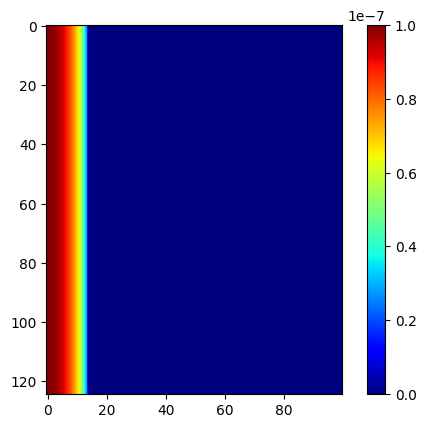

In [104]:
plt.imshow(ZS,cmap='jet')
plt.colorbar()

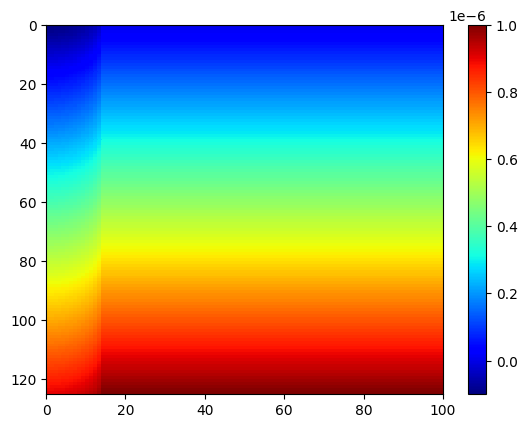

In [105]:
plt.pcolor(Z[:,:]-ZS[:,:],cmap="jet")
plt.gca().invert_yaxis()
plt.colorbar()

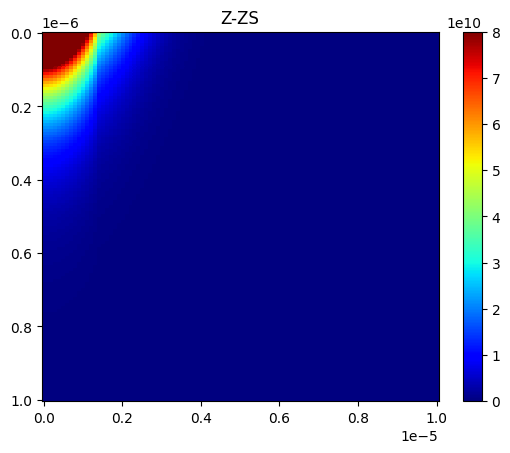

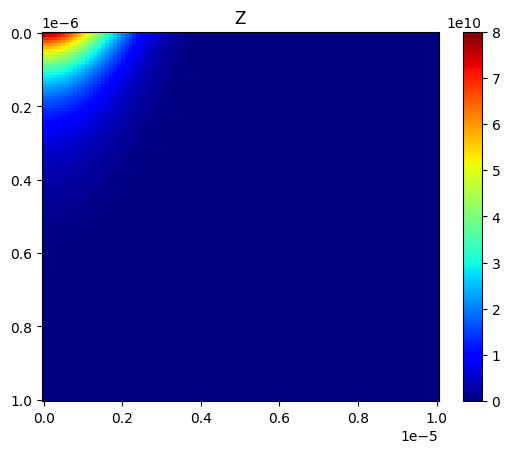

In [106]:
### Cálculos de la Fuente Laser 
    # Q(x,y,z,t) = T(t) * S(x,y,z)

T = 1/tp * np.sqrt(4 * np.log(2)/np.pi) * np.exp(
-4*np.log(2) * ((t - 2*tp)/tp)**2)

S = (1-R)/(delta + ball_len) * F * w0**2/w**2 * np.exp(
-(Z-ZS)/(delta+ball_len) - (2*(X-x0)**2/w**2))

S_fix = (1-R)/(delta + ball_len) * F * w0**2/w**2 * np.exp(
-(Z)/(delta+ball_len) - (2*(X-x0)**2/w**2))

plt.pcolor(x,z,S,cmap='jet',vmin = S_fix.min(),vmax = S_fix.max())
plt.gca().invert_yaxis()
plt.title("Z-ZS")
plt.colorbar(cmap='jet',)
plt.show()
    
plt.pcolor(x,z,S_fix,cmap='jet',vmin = S_fix.min(),vmax = S_fix.max())
plt.gca().invert_yaxis()
plt.title("Z")
plt.colorbar(cmap='jet')
plt.show()  

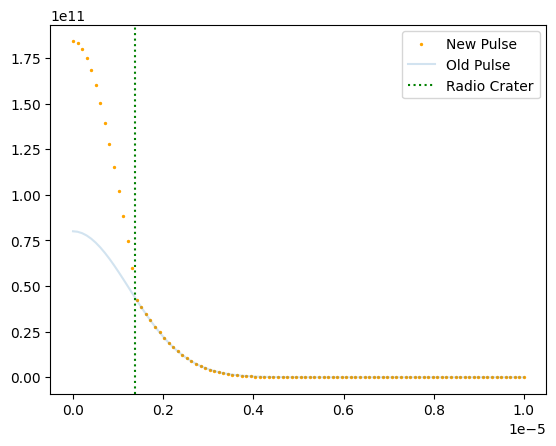

In [107]:
plt.scatter(x,S[0,:],s=2,c="orange",label = "New Pulse")
plt.plot(x,S_fix[0,:],alpha=0.2,label = "Old Pulse")
plt.axvline(radius_crater,ls="dotted",label = "Radio Crater",c="green")
plt.legend()

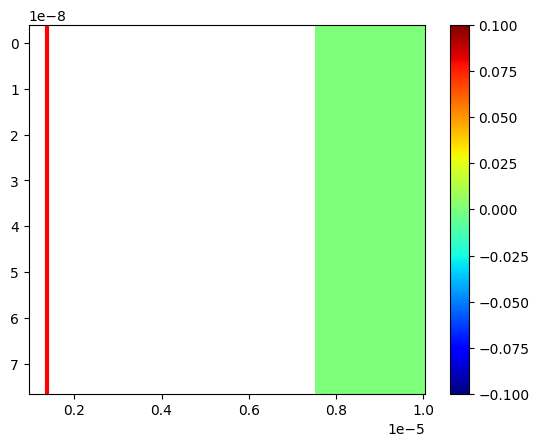

In [108]:
plt.pcolor(x[75:125],z[0:10],(S[0:10,75:125]-S_fix[0:10,75:125]),cmap = 'jet')
plt.gca().invert_yaxis()
plt.colorbar(cmap='jet')
plt.axvline(radius_crater,c="red",lw=3)

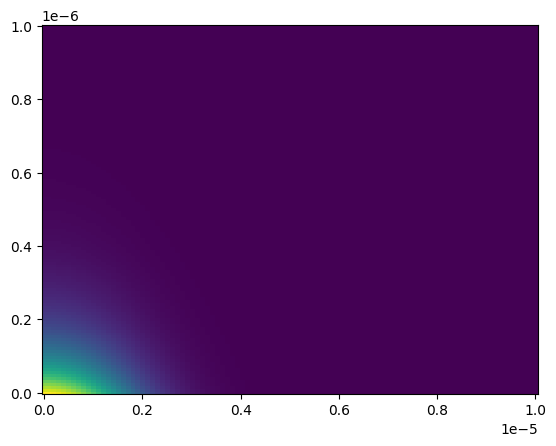

In [110]:
plt.pcolor(x,z,S_fix)